TUGAS
1) mainkan paramter-parameter (ambang batas jam, jam istirahat harian, pengali/pembagi eksponen)
1a) plot grafik-grafik secara berdampingan untuk membandingkan skalanya
2) tambahkan faktor-faktor ke objective function (jika perlu)
3) temukan titik optimum sesuai diri masing-masing, temukan secara 'numerik', sebisa mungkin jangan pakai np.argmax
4) buat cerita aktivitas harian sesuai, bagaimana agar lebih baik/sehat (poin 4 paling penting)


Aktivitas harian :  
05:00 : Bangun tidur  
05:00 - 05:30 : Relaksasi (0.5 jam)  
05:30 - 07:30 : Bersiap (2 jam)  
07:30 - 12:00 : Kuliah (4.5 jam)  
12:00 - 13:00 : Istirahat (1 jam)  
13:00 - 16:00 : Kuliah siang (3.0 jam)  
16:00 - 18:00 : Masak & Makan (2 jam)  
18:00 - 20:00 : Istirahat (2 jam)  
20:00 - 21:00 : Sosialisasi (daring) dengan keluarga (1 jam)  
21:00 - 23:00 : Belajar mandiri (2 jam)  
23:00 - 00:00 : Waktu santai / review ringan (1 jam)  
00:00 - 05:00 : Tidur (5 jam)

In [12]:
# Nama : Siti Rania Azaria
# NPM : 24083010072

import numpy as np
import matplotlib.pyplot as plt

NPM = 72
rest_hours = 5 # Istirahat
alpha = 0.8
beta = 0.6

# Ambang batas penalty
threshold_main = 4
threshold_lembur = 8

# Faktor tambahan (akan dimodifikasi bentuknya)
bonus_relaksasi = 0.5
bonus_masak = 0.7
bonus_social = 1.0

# Konversi jam
def format_time(t):
    h = int(t) % 24
    m = int((t % 1) * 60)
    return f"{h:02d}:{m:02d}"

# Objective Function dasar
def objective(x, y, social=1.0):
    score = (x**alpha) * (np.exp(-x/NPM)) + (y**beta) * (np.exp(-y/NPM))

    # nilai bonus
    score += bonus_relaksasi
    score += bonus_masak
    score += bonus_social * np.exp(-abs(social - 1.0))

    # penalty
    if y > threshold_main:
        score -= 0.5 * (y - threshold_main)**2
    if x > threshold_lembur:
        score -= 0.3 * (x - threshold_lembur)**2

    return score

# Nilai optimum numerik
X = np.linspace(0, 12, 121)
Y = np.linspace(0, 6, 61)

opt_x, opt_y, opt_z = None, None, -1e9
for xi in X:
    for yj in Y:
        score = objective(xi, yj)
        if score > opt_z:
            opt_x, opt_y, opt_z = xi, yj, score

print("\Hasil Optimum Numerik")
print(f"Jam Kuliah Optimal   : {opt_x:.2f} jam")
print(f"Jam Main Optimal     : {opt_y:.2f} jam")
print(f"Quality Score Optimal: {opt_z:.2f}")

\Hasil Optimum Numerik
Jam Kuliah Optimal   : 8.70 jam
Jam Main Optimal     : 4.30 jam
Quality Score Optimal: 9.27


<>:55: SyntaxWarning: invalid escape sequence '\H'
<>:55: SyntaxWarning: invalid escape sequence '\H'
/tmp/ipython-input-2142703112.py:55: SyntaxWarning: invalid escape sequence '\H'
  print("\Hasil Optimum Numerik")


Berdasarkan faktor-faktor eksternal yang telah ditambahkan, didapatkan :  
Jam kuliah optimal selama 8-9 jam per hari  
Jam main optimal selama 4 jam per hari

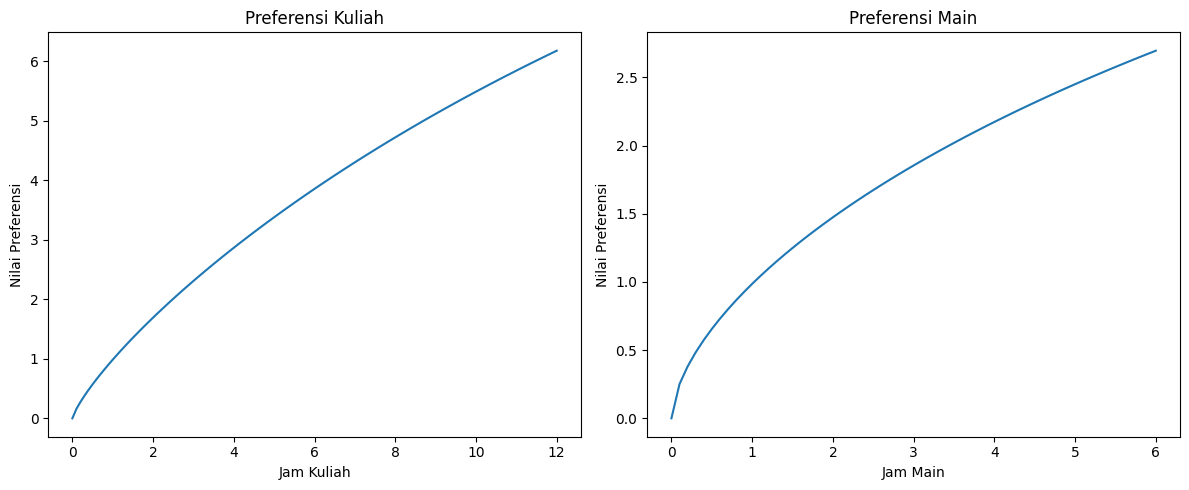

In [13]:
# Visualisasi preferensi
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].plot(X, (X**alpha) * np.exp(-X/NPM))
axes[0].set_title("Preferensi Kuliah")
axes[0].set_xlabel("Jam Kuliah")
axes[0].set_ylabel("Nilai Preferensi")

axes[1].plot(Y, (Y**beta) * np.exp(-Y/NPM))
axes[1].set_title("Preferensi Main")
axes[1].set_xlabel("Jam Main")
axes[1].set_ylabel("Nilai Preferensi")

plt.tight_layout()
plt.show()

- Grafik preferensi kuliah menggambarkan kurva yang cekung ke bawah (kenaikan yang makin lama, makin landai). Pada durasi 0-4 jam pembelajaran akan menghasilkan kualitas belajar yang baik. Namun, setelah durasi >6 jam, perlahan kualitas belajar akan menurun (dapat disebabkan karena burnout).  
- Grafik preferensi main menggambarkan kurva yang juga cekung ke bawah. Pada durasi 0-2 jam bermain dapat menyegarkan pikiran. Namun, setelah durasi >3-4 jam, manfaat bermain perlahan menurun (dapat disebabkan karena jenuh).

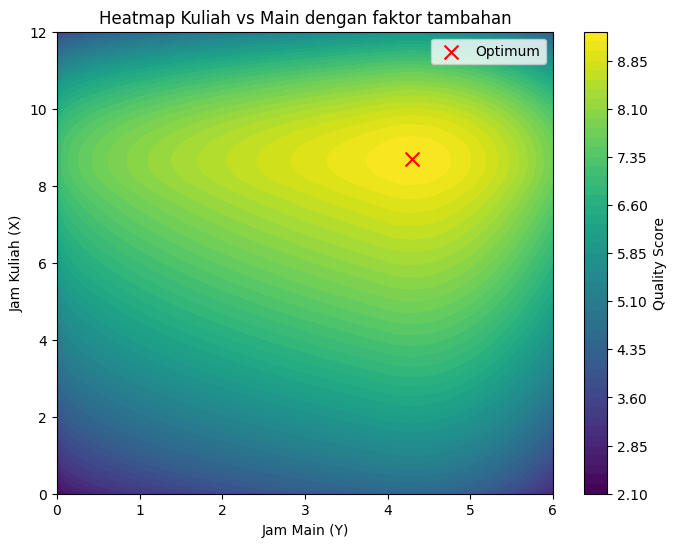

In [14]:
# Heatmap
Z = np.zeros((len(X), len(Y)))
for i, xi in enumerate(X):
    for j, yj in enumerate(Y):
        Z[i, j] = objective(xi, yj)

plt.figure(figsize=(8,6))
plt.contourf(Y, X, Z, levels=50, cmap="viridis")
plt.colorbar(label="Quality Score")
plt.xlabel("Jam Main (Y)")
plt.ylabel("Jam Kuliah (X)")
plt.scatter(opt_y, opt_x, color="red", marker="x", s=100, label="Optimum")
plt.legend()
plt.title("Heatmap Kuliah vs Main dengan faktor tambahan")
plt.show()

Titik optimum berada pada jam kuliah selama 8,7 jam dan jam bermain selama 4,3 jam.  
Dari pola warna di atas, terlihat bahwa jika  :    
- Kuliah > 10 jam (skor menurun tajam karena adanya penalty) mengakibatkan burnout atau kelelahan.
- Kuliah < 6 jam akan memunculkan kualitas pembelajaran yang rendah.  
- Main > 5 jam (skor menurun tajam karena adanya penalty) mengakibatkan banyak waktu yang terbuang karena terlena.
- Main < 2 jam akan mengurangi waktu menghibur diri.

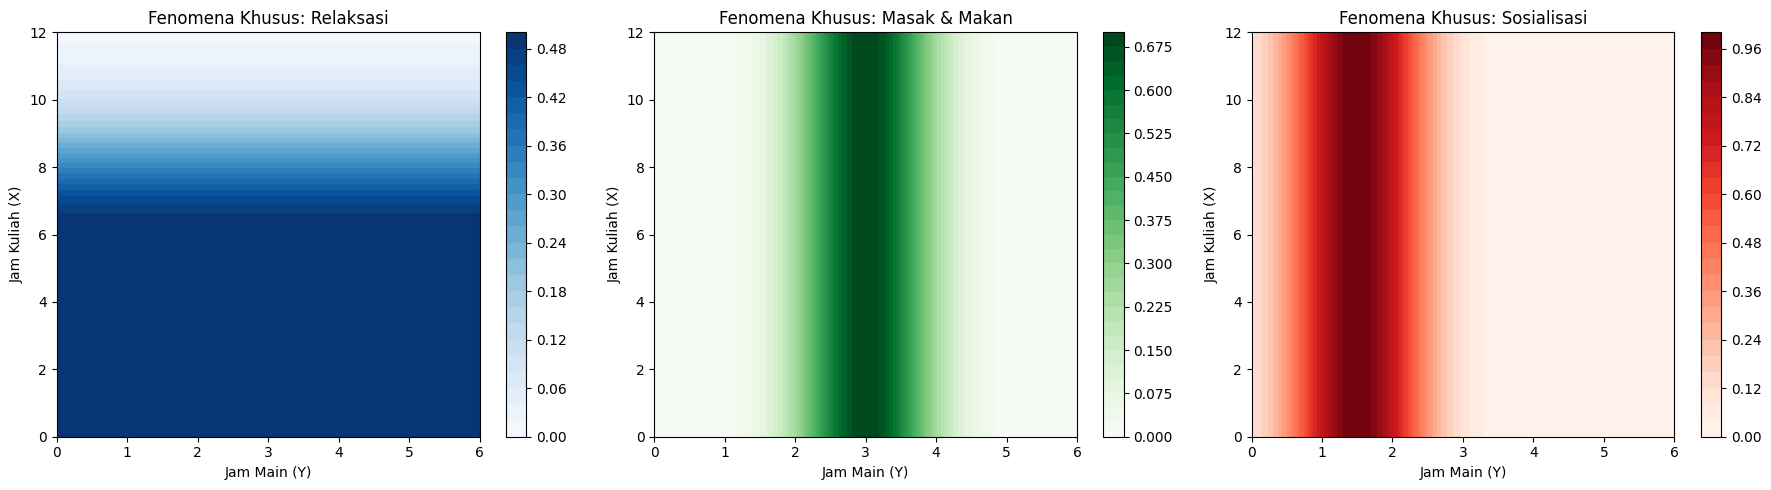

In [15]:
# Plot Keadaan Khusus
Z_relaksasi = np.zeros((len(X), len(Y)))
Z_masak = np.zeros((len(X), len(Y)))
Z_sosial = np.zeros((len(X), len(Y)))

for i, xi in enumerate(X):
    for j, yj in enumerate(Y):
        # Relaksasi → efektif kalau jam kuliah ≤ 6
        Z_relaksasi[i, j] = bonus_relaksasi * np.exp(-max(0, xi-6)**2 / 10)

        # Masak → optimal di sekitar jam main 2–4
        Z_masak[i, j] = bonus_masak * np.exp(-(yj-3)**2)

        # Sosialisasi → optimal di sekitar jam main 1–2
        Z_sosial[i, j] = bonus_social * np.exp(-(yj-1.5)**2)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Relaksasi
c1 = axes[0].contourf(Y, X, Z_relaksasi, levels=30, cmap='Blues')
axes[0].set_title("Fenomena Khusus: Relaksasi")
axes[0].set_xlabel("Jam Main (Y)")
axes[0].set_ylabel("Jam Kuliah (X)")
fig.colorbar(c1, ax=axes[0])

# Masak
c2 = axes[1].contourf(Y, X, Z_masak, levels=30, cmap='Greens')
axes[1].set_title("Fenomena Khusus: Masak & Makan")
axes[1].set_xlabel("Jam Main (Y)")
axes[1].set_ylabel("Jam Kuliah (X)")
fig.colorbar(c2, ax=axes[1])

# Sosialisasi
c3 = axes[2].contourf(Y, X, Z_sosial, levels=30, cmap='Reds')
axes[2].set_title("Fenomena Khusus: Sosialisasi")
axes[2].set_xlabel("Jam Main (Y)")
axes[2].set_ylabel("Jam Kuliah (X)")
fig.colorbar(c3, ax=axes[2])

plt.tight_layout()
plt.show()

- Grafik relaksasi menunjukkan waktu yang efektif kuliah adalah tidak lebih dari 6 jam. Karena ketika lebih dari 6 jam, relaksasi akan sulit optimal karena sudah terlalu lama kuliah.  
- Grafik masak & makan menunjukkan waktu optimal ketika puncaknya berada di 2-4 jam bermain yang artinya kegiatan masak & makan bisa dilakukan setelah melakukan aktivitas bermain, karena manfaatnya akan lebih terasa dibandingkan ketika makan terlalu cepat.
- Grafik sosialisasi dengan keluarga menunjukkan waktu optimal saat durasi bermain 1-2 jam yang artinya interaksi sosial paling efektif dilakukan setelah ada sedikit waktu hiburan/main karena kondisi pikiran sudah lebih rileks.

In [16]:
# Jadwal keseharian rania
def generate_story(opt_x=4.5, opt_y=3.0):
    story = ""

    # Bangun tidur
    bangun = 5.0
    story += f"{format_time(bangun)} : Bangun tidur\n"

    # Relaksasi
    relaksasi_start = bangun
    relaksasi_end = relaksasi_start + 0.5
    story += f"{format_time(relaksasi_start)} - {format_time(relaksasi_end)} : Relaksasi (0.5 jam)\n"

    # Bersiap
    siap_start = relaksasi_end
    siap_end = siap_start + 2.0
    story += f"{format_time(siap_start)} - {format_time(siap_end)} : Bersiap (2 jam)\n"

    # Kuliah pagi
    kuliah_pagi_start = siap_end
    kuliah_pagi_end = kuliah_pagi_start + 4.5
    story += f"{format_time(kuliah_pagi_start)} - {format_time(kuliah_pagi_end)} : Kuliah (4.5 jam)\n"

    # Istirahat
    istirahat1_start = kuliah_pagi_end
    istirahat1_end = istirahat1_start + 1.0
    story += f"{format_time(istirahat1_start)} - {format_time(istirahat1_end)} : Istirahat (1 jam)\n"

    # Kuliah siang
    kuliah_siang_start = istirahat1_end
    kuliah_siang_end = kuliah_siang_start + 3.0
    story += f"{format_time(kuliah_siang_start)} - {format_time(kuliah_siang_end)} : Kuliah siang (3.0 jam)\n"

    # Masak & makan
    masak_start = kuliah_siang_end
    masak_end = masak_start + 2.0
    story += f"{format_time(masak_start)} - {format_time(masak_end)} : Masak & Makan (2 jam)\n"

    # Istirahat sore
    istirahat2_start = masak_end
    istirahat2_end = istirahat2_start + 2.0
    story += f"{format_time(istirahat2_start)} - {format_time(istirahat2_end)} : Istirahat (2 jam)\n"

    # Sosialisasi
    sos_start = istirahat2_end
    sos_end = sos_start + 1.0
    story += f"{format_time(sos_start)} - {format_time(sos_end)} : Sosialisasi (daring) dengan keluarga (1 jam)\n"

    # Belajar mandiri
    belajar_start = sos_end
    belajar_end = belajar_start + 2.0
    story += f"{format_time(belajar_start)} - {format_time(belajar_end)} : Belajar mandiri (2 jam)\n"

    # Santai
    santai_start = belajar_end
    santai_end = santai_start + 1.0
    story += f"{format_time(santai_start)} - {format_time(santai_end)} : Waktu santai / review ringan (1 jam)\n"

    # Tidur
    story += "00:00 - 05:00 : Tidur (5 jam)\n"

    return story

print("Jadwal Harian Rania")
print(generate_story())

Jadwal Harian Rania
05:00 : Bangun tidur
05:00 - 05:30 : Relaksasi (0.5 jam)
05:30 - 07:30 : Bersiap (2 jam)
07:30 - 12:00 : Kuliah (4.5 jam)
12:00 - 13:00 : Istirahat (1 jam)
13:00 - 16:00 : Kuliah siang (3.0 jam)
16:00 - 18:00 : Masak & Makan (2 jam)
18:00 - 20:00 : Istirahat (2 jam)
20:00 - 21:00 : Sosialisasi (daring) dengan keluarga (1 jam)
21:00 - 23:00 : Belajar mandiri (2 jam)
23:00 - 00:00 : Waktu santai / review ringan (1 jam)
00:00 - 05:00 : Tidur (5 jam)



Berdasarkan keseharian saya, saya telah mengatur jadwal aktivitas keseharian saya yang masing-masing variabelnya telah disesuaikan.  
Di pagi hari, waktu bangun saya cukup ideal pada jam 5 pagi dan selama 30 menit setelahnya juga ada relaksasi untuk meningkatkan konsentrasi.  
Ketika beraktivitas kuliah, selama 8-9 jam sudah menunjukkan waktu yang optimal untuk menjaga kualitas belajar saya.  
Di siang hari, saya beristirahat sejenak selama 1 jam untuk mengembalikan energi saya.  
Di sore hari, saya kembali ke kos dan beristirahat selama kurang lebih 2 jam.  
Di malam hari, saya membutuhkan waktu untuk berkomunikasi sejenak dengan keluarga saya pada waktu yang terbilang sedang santai.  
Lalu sebelum tidur, saya mengerjakan tugas atau kembali mereview materi pembelajaran perkuliahan.  
Pada jam 12 malam saya tidur dengan durasi selama 5 jam untuk bangun dan kembali melakukan aktivitas di keesokan hari.  

- Hal yang perlu diperbaiki :    
1. Durasi tidur saya yang kurang ideal.
2. Istirahat di sore hari yang terlalu panjang.
3. Sebelum tidur diusahakan tidak ada waktu santai untuk kesempatan bermain sosmed karena akan berpotensi untuk terdistraksi sehingga sulit tidur.  

- Hal yang perlu dipertahankan :    
1. Bangun di jam 5 pagi sudah menunjukkan waktu yang ideal untuk bersiap.
2. Relaksasi setelah bangun perlu untuk tetap dipertahankan karena dapat menyegarkan tubuh dan meningkatkan fokus.  
3. Sosialisasi selama kurang lebih 1 jam di saat santai perlu dilakukan sebagai pengalihan agar tidak terus menerus terdistraksi dengan sosial media.  
4. Mengerjakan tugas/belajar di malam hari dapat mendukung kualitas belajar dari yang sudah dilakukan selama 8 jam kuliah.
